In [3]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [4]:
import prince
import pandas as pd

### Import the HR data set 

In [9]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'
df = pd.read_csv(data_url)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [12]:
df.select_dtypes('number')
df['Zip'] = df.Zip.astype(str)
df.select_dtypes('number')

,Age,Pay Rate,Days Employed
0,30,28.50,3317
1,34,23.00,1420
2,31,29.00,1154
3,32,21.50,58
4,30,16.56,940
...,...,...,...
305,48,52.25,289
306,36,51.00,284
307,34,46.00,284
308,30,45.00,220


### Pull out the categorical variables and note the dimensions of the data set.

In [14]:
cat = df.select_dtypes('O')
cat.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [26]:
model = prince.MCA(n_components=2)
mca = model.fit(cat)
coordinates = mca.transform(cat)

### Plot the coordinates of each resulting dimension.

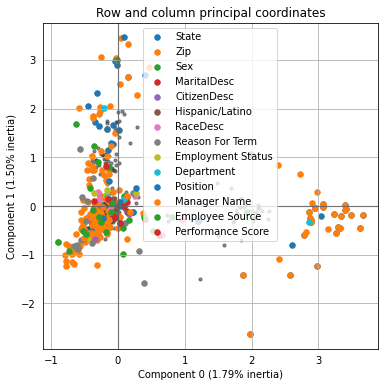

In [28]:
mca.plot_coordinates(cat)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [32]:
cat_one_hot = pd.get_dummies(cat, drop_first=True)
cat_one_hot.shape

(310, 299)

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [61]:
model2 = prince.CA(n_components=2)
ca_one_hot = model2.fit(cat_one_hot)
coordinates_one_hot = mca_one_hot.transform(cat_one_hot)

### Plot the coordinates of each resulting dimension.

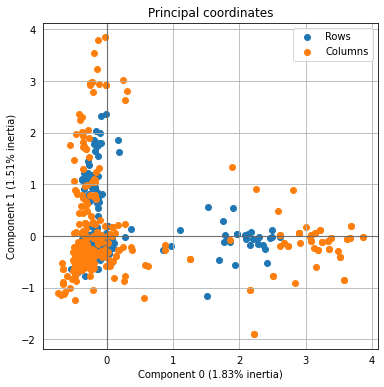

In [62]:
ca_one_hot.plot_coordinates(cat_one_hot, show_row_labels=False, show_col_labels=False)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [37]:
model = prince.FAMD(n_components=2)
famd = model.fit(df)
coordinates_famd = famd.transform(df)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

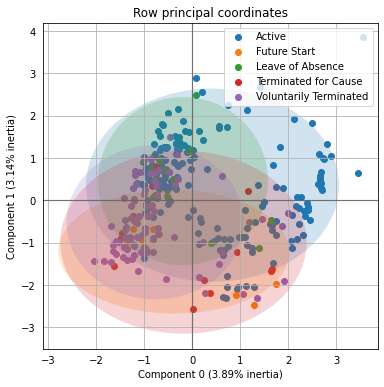

In [50]:
famd.plot_row_coordinates(df, color_labels=df['Employment Status'])
plt.show()